# FINAL Analysis 1 - Exploratory Analysis

# We divide our analysis in following parts :  
A) **Quarterly Analysis** : Count bookings, deals, browsing activities and find unique relationships.

B) **Monthly Analysis** : Count bookings, deals, browsing activities and find unique relationships

C) **Weekly Analysis** : Count bookings, deals, browsing activities and find unique relationships

D) **Effective marketing channel** : Finding the most effective marketing channel over Time period

E) **Loyal/Runaway Customer Booking Pattern** : Analysing relation between ratings and Booking price paid

F) **Hotel Pricing Segmentation** : Understanding the price ranges and dissecting hotels into groups

# A) Quarterly Analysis :

**Step 1 :**
- Reading through the CSV Datasets and understanding users booked vs Users not booked
- Using Pandas functionalities to get Quarter, Month, Day and Hour of the week when the customer booked the hotel.
- Drill down to get all data fro four quarters and perform various analysis like hotel booking counts. children and adult booking, ratings for hotels, revenues across each quarters, most effective marketing channel and deals booking.

In [45]:
# Reading all required pandas libraries

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import requests
import logging
import os
import json
import sys
import bokeh 
from ipywidgets import interact
from bokeh.io import push_notebook,show,output_notebook
from bokeh.plotting import figure
import cufflinks as cf
cf.set_config_file(world_readable=True,offline=False)
%matplotlib inline
import seaborn as sns
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
from plotly.graph_objs import *

In [47]:
test_data = pd.read_csv('test.csv')
test_data['date_time'] = pd.to_datetime(test_data['date_time']) # Converting into Date Time
full_quarter = test_data.sort('date_time')

C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:3: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



In [48]:
full_quarter.head(3)

id           date_time  site_name  posa_continent  \
337252  337252 2015-01-08 00:00:00          2               3   
299199  299199 2015-01-08 00:02:00         37               1   
485214  485214 2015-01-08 00:03:00         25               2   

        user_location_country  user_location_region  user_location_city  \
337252                     66                   174               26232   
299199                     62                   135               43030   
485214                     23                    48                4924   

        orig_destination_distance  user_id  is_mobile    ...      \
337252                  1923.9958  1121516          1    ...       
299199                        NaN   999146          0    ...       
485214                        NaN   410294          0    ...       

        srch_children_cnt  srch_rm_cnt srch_destination_id  \
337252                  0            1                8266   
299199                  0            1               12857   
485214                  0            1                8745   

       srch_destination_type_id  hotel_continent  hotel_country  hotel_market  \
337252                        1                2             50           411   
299199                        5                6             70          1914   
485214                        1                6            204            27   

        is_booking  ratings  pricepaid  
337252           0        8       2403  
299199           1        2       1689  
485214           1        0       4094  

[3 rows x 25 columns]

In [49]:
df = full_quarter['date_time']
full_quarter['Quarter'] = df.dt.quarter
full_quarter['Year'] = df.dt.year
full_quarter['Month'] = df.dt.month
full_quarter['Day'] = df.dt.weekday_name
full_quarter['Hour_of_Day'] = df.dt.hour

In [50]:
full_quarter.sort_values(['Year','Quarter','Month','Day','Hour_of_Day'],inplace=True)

In [51]:
full_quarter.head(3)

id           date_time  site_name  posa_continent  \
208318  208318 2015-01-09 00:00:00         24               2   
334276  334276 2015-01-09 00:01:00          2               3   
863502  863502 2015-01-09 00:03:00          2               3   

        user_location_country  user_location_region  user_location_city  \
208318                      3                    50               13871   
334276                     66                   174               23793   
863502                     66                   220               20753   

        orig_destination_distance  user_id  is_mobile     ...       \
208318                        NaN   695255          1     ...        
334276                  2074.9510  1111209          0     ...        
863502                   107.3611   472529          1     ...        

        hotel_country  hotel_market is_booking ratings  pricepaid  Quarter  \
208318             99            88          1       1       2961        1   
334276             50           350          1       7       2085        1   
863502             50           701          1       9       1941        1   

        Year  Month     Day  Hour_of_Day  
208318  2015      1  Friday            0  
334276  2015      1  Friday            0  
863502  2015      1  Friday            0  

[3 rows x 30 columns]

In [52]:
UserBrowing = full_quarter[(full_quarter['is_booking']==0)]
UserBrowing = pd.DataFrame(UserBrowing['is_booking'])
SuccessfulBooking = full_quarter[(full_quarter['is_booking']==1)]
SuccessfulBooking = pd.DataFrame(SuccessfulBooking['is_booking'])
TotalBookingRecords = full_quarter[(full_quarter['is_booking']==1) |(full_quarter['is_booking']==0) ]
TotalBookingRecords = pd.DataFrame(TotalBookingRecords['is_booking'])

In [53]:
UserBrowing_count = UserBrowing.count()
SuccessfulBooking_count = SuccessfulBooking.count()
TotalBookingRecords = TotalBookingRecords.count() 

In [54]:
Total_Booking_Percentage = (SuccessfulBooking_count/TotalBookingRecords)*100
Total_Browsing_percentage = (UserBrowing_count/TotalBookingRecords)*100

In [55]:
print("Total Users Booking from Expedia after Browsing",Total_Booking_Percentage)
print("Total Users Browsing but not booking from Expedia ",Total_Browsing_percentage)

Total Users Booking from Expedia after Browsing is_booking    49.956655
dtype: float64
Total Users Browsing but not booking from Expedia  is_booking    50.043345
dtype: float64


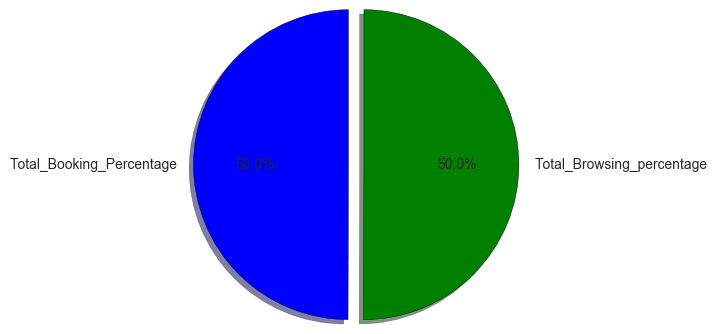

In [120]:
labels = 'Total_Booking_Percentage', 'Total_Browsing_percentage'
sizes = [Total_Booking_Percentage,Total_Browsing_percentage]
explode = (0, 0.1,)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Conclusion:  Thus we have 50%-50% chances for converting one from browsing to booking. Let us now analyse the following points

# A) Quarterly Analysis :

**Step 2 : Further Drill down**
- User browsing/Booking per Quarter,  per Month and per Hour to analyse highly browsed /booked quarter with room searches, adult and children booking pattern

- User Booking on packages, bookings through mobile and most effective marketing channel per continent, per country to per city to understand trends

In [56]:
quarter1_2015 = full_quarter[(full_quarter['Quarter']==1) & (full_quarter['Year']==2015)]
quarter2_2015 = full_quarter[(full_quarter['Quarter']==2) & (full_quarter['Year']==2015)]
quarter3_2015 = full_quarter[(full_quarter['Quarter']==3) & (full_quarter['Year']==2015)]
quarter4_2015 = full_quarter[(full_quarter['Quarter']==4) & (full_quarter['Year']==2015)]
Count_Row_full_quarter=full_quarter.shape[0]
Count_Row_quarter1_2015 = quarter1_2015.shape[0]
Count_Row_quarter2_2015 = quarter2_2015.shape[0]
Count_Row_quarter3_2015 = quarter3_2015.shape[0]
Count_Row_quarter4_2015 = quarter4_2015.shape[0]
UserBrowsing_Per_quarter1 = (Count_Row_quarter1_2015/Count_Row_full_quarter)*100
UserBrowsing_Per_quarter2 = (Count_Row_quarter2_2015/Count_Row_full_quarter)*100
UserBrowsing_Per_quarter3 = (Count_Row_quarter3_2015/Count_Row_full_quarter)*100
UserBrowsing_Per_quarter4 = (Count_Row_quarter4_2015/Count_Row_full_quarter)*100

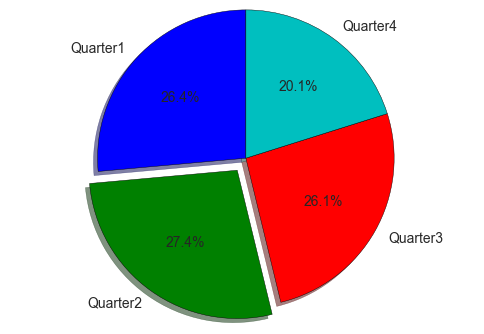

In [57]:
labels = 'Quarter1', 'Quarter2', 'Quarter3', 'Quarter4'
sizes = [UserBrowsing_Per_quarter1,UserBrowsing_Per_quarter2, UserBrowsing_Per_quarter3, UserBrowsing_Per_quarter4]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Conclusion :
- We see that Quarter 2 has maximum Total Browsing activity and Quarter 4 has least. We will analyse the booking pattern across all 4 quarters

# Quarterly Analysis :

**Step 3 : Deeper : Drilling inside Quarters for more information**
- Drill down to find monthly representation of revenues and find month with highest revenues and lowest revenues
- Drill down to find week days with highest revenues and lowest revenues across all 4 quarters to find best day to book


In [58]:
quartelyAnalysis = pd.DataFrame(full_quarter.groupby('Quarter').sum())
quartelyAnalysis = quartelyAnalysis[['is_mobile','is_package','srch_adults_cnt','srch_children_cnt','srch_rm_cnt','is_booking']]

In [59]:
quartelyAnalysis.head(5)

is_mobile  is_package  srch_adults_cnt  srch_children_cnt  \
Quarter                                                              
1            37221       36234           538554              64485   
2            39219       27588           566993              78689   
3            42045       27631           535844              69559   
4            31137       23699           412028              50442   

         srch_rm_cnt  is_booking  
Quarter                           
1             310467      138387  
2             321878      143185  
3             303845      136702  
4             236173      105559

In [60]:
quartelyAnalysis.iplot(kind='bar',xTitle="Quarters",yTitle="Counts")

# Quarterly Analysis :

**Step 4 : Deeper : Drilling inside months and Days to find highest revenue grossed**
- Drill down to find monthly representation of revenues and find month with highest revenues and lowest revenues
- Drill down to find week days with highest revenues and lowest revenues across all 4 quarters to find best day to book


** Analysing monthly revenue data from the dataframes made above **

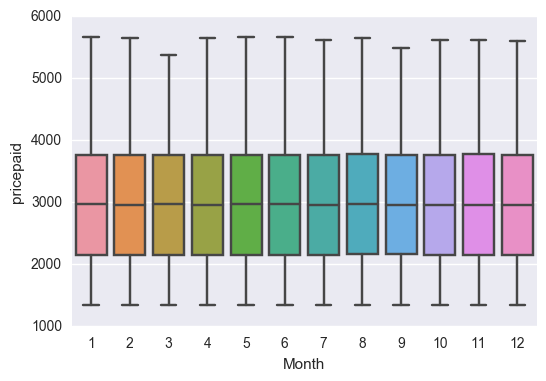

In [61]:
sns.boxplot(x="Month", y="pricepaid",data=full_quarter)

** Drilling down in each quarter to find revenues and ratings generated across each month and day ** 

In [62]:
quarter1_2015_booking=quarter1_2015[(quarter1_2015['is_booking']==1)]
quarter1_2015_non_booking = quarter1_2015[(quarter1_2015['is_booking']==0)]

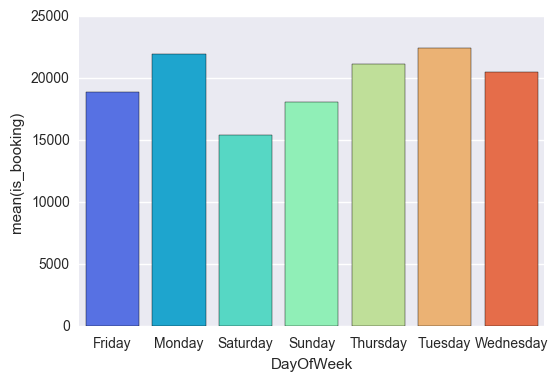

In [63]:
bestTime_quarter1 = quarter1_2015_booking.groupby('Day').sum()
bestTime_quarter1 =  bestTime_quarter1[['is_booking']]
bestTime_quarter1['DayOfWeek'] = bestTime_quarter1.index
sns.barplot(x="DayOfWeek", y="is_booking", data=bestTime_quarter1,palette='rainbow',)

In [64]:
quarter1_2015_booking.head(4)

id           date_time  site_name  posa_continent  \
208318  208318 2015-01-09 00:00:00         24               2   
334276  334276 2015-01-09 00:01:00          2               3   
863502  863502 2015-01-09 00:03:00          2               3   
41518    41518 2015-01-09 00:07:00         37               1   

        user_location_country  user_location_region  user_location_city  \
208318                      3                    50               13871   
334276                     66                   174               23793   
863502                     66                   220               20753   
41518                      69                   585               40970   

        orig_destination_distance  user_id  is_mobile     ...       \
208318                        NaN   695255          1     ...        
334276                  2074.9510  1111209          0     ...        
863502                   107.3611   472529          1     ...        
41518                         NaN   139004          0     ...        

        hotel_country  hotel_market is_booking ratings  pricepaid  Quarter  \
208318             99            88          1       1       2961        1   
334276             50           350          1       7       2085        1   
863502             50           701          1       9       1941        1   
41518              50           686          1       6       4477        1   

        Year  Month     Day  Hour_of_Day  
208318  2015      1  Friday            0  
334276  2015      1  Friday            0  
863502  2015      1  Friday            0  
41518   2015      1  Friday            0  

[4 rows x 30 columns]

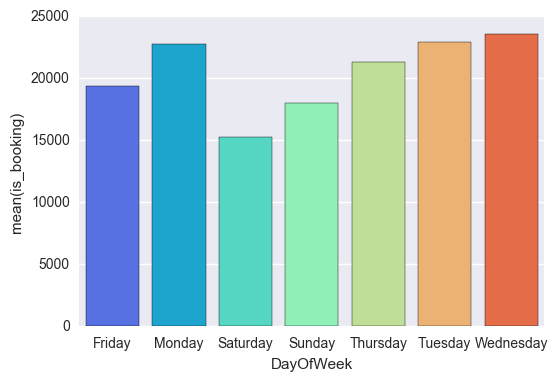

In [65]:
quarter2_2015_booking=quarter2_2015[(quarter2_2015['is_booking']==1)]
quarter2_2015_non_booking = quarter2_2015[(quarter2_2015['is_booking']==0)]
bestTime_quarter2 = quarter2_2015_booking.groupby('Day').sum()
bestTime_quarter2 =  bestTime_quarter2[['is_booking']]
bestTime_quarter2['DayOfWeek'] = bestTime_quarter2.index
sns.barplot(x="DayOfWeek", y="is_booking", data=bestTime_quarter2,palette='rainbow',)

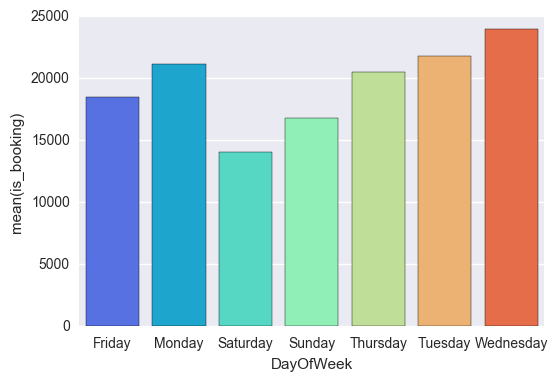

In [66]:
quarter3_2015_booking=quarter3_2015[(quarter3_2015['is_booking']==1)]
quarter3_2015_non_booking = quarter3_2015[(quarter3_2015['is_booking']==0)]
bestTime_quarter3 = quarter3_2015_booking.groupby('Day').sum()
bestTime_quarter3 =  bestTime_quarter3[['is_booking']]
bestTime_quarter3['DayOfWeek'] = bestTime_quarter3.index
sns.barplot(x="DayOfWeek", y="is_booking", data=bestTime_quarter3,palette='rainbow',)

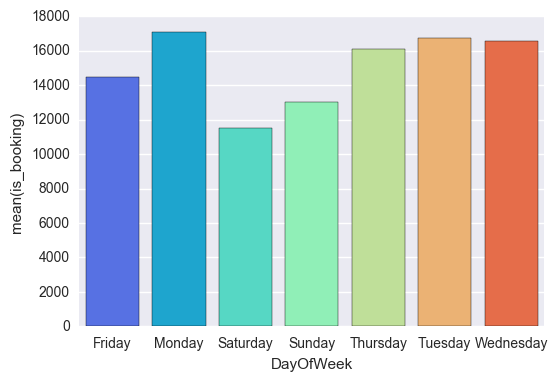

In [67]:
quarter4_2015_booking=quarter4_2015[(quarter4_2015['is_booking']==1)]
quarter4_2015_non_booking = quarter4_2015[(quarter4_2015['is_booking']==0)]
bestTime_quarter4 = quarter4_2015_booking.groupby('Day').sum()
bestTime_quarter4 =  bestTime_quarter4[['is_booking']]
bestTime_quarter4['DayOfWeek'] = bestTime_quarter4.index
sns.barplot(x="DayOfWeek", y="is_booking", data=bestTime_quarter4,palette='rainbow',)

# B) Monthly Analysis :

**Steps :**
- Reading through the CSV Datasets and understanding users booked vs Users not booked
- Drill down to get all data fro four quarters and perform various analysis like hotel booking counts. children and adult booking, ratings for hotels, revenues across each quarters, most effective marketing channel and deals booking.

In [68]:
monthlyAnalysis = pd.DataFrame()
monthlyAnalysis = full_quarter.groupby('Month').sum()
monthlyAnalysis = monthlyAnalysis[['is_mobile','is_booking','srch_adults_cnt','srch_children_cnt','srch_rm_cnt']]
monthlyAnalysis.head(4)

is_mobile  is_booking  srch_adults_cnt  srch_children_cnt  srch_rm_cnt
Month                                                                        
1          10766       40490           156777              15983        91135
2          12409       45853           177311              20168       102397
3          14046       52044           204466              28334       116935
4          11779       45911           178988              21412       103175

In [69]:
monthlyAnalysis.iplot(kind="scatter",size=30,xTitle='Months',yTitle='Count of the Axes')

In [70]:
#Unsuccessful_monthly_not_booked_values = full_quarter[(full_quarter['is_booking']==0)]
monthly_not_booked_values = Unsuccessful_monthly_not_booked_values.groupby('Month').count()

In [71]:
monthly_not_booked_values['Months'] = monthly_not_booked_values.index
monthly_unbooked_data_df = monthly_not_booked_values[['Months','is_booking']]

In [72]:
monthly_unbooked_data_df['Unbooked_Counts'] = monthly_unbooked_data_df['is_booking']

C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



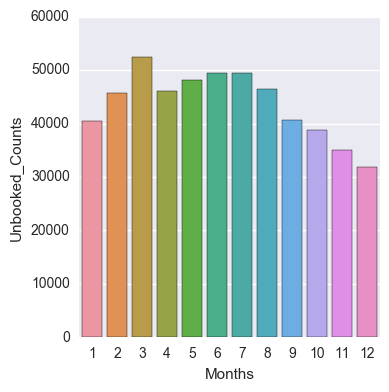

In [73]:
sns.factorplot(x='Months',y='Unbooked_Counts',data=monthly_unbooked_data_df,kind='bar')

# Conclusion : Thus we can conclude that March had most number of unbooked hotels with December as most booked ones 

# C) Hourly Analysis :

**Steps :**
- Drill down to get all data from four quarters and perform groupby on Hours to analyse like hotel booking counts. children and adult booking, ratings for hotels, revenues across each quarters, most effective marketing channel and deals booking.

In [74]:
# We will analyse how much users are booking on HOURLY Basis to understand user booking pattern 
hourlyAnalysis = pd.DataFrame()
hourlyAnalysis = full_quarter.groupby('Hour_of_Day').sum()
hourlyAnalysis = hourlyAnalysis[['is_mobile','is_package','is_booking']]
hourlyAnalysis.iplot(kind="bar",size=60)

# ===========================================================

# D) **Effective marketing channel** : Finding the most effective marketing channel over Time period


**Analysing Effectiveness of Mobile usage, Package deal booking and most effective marketing channels across continent, country, city and find out the best times for booking**

**Steps:**
- Analyse the best performing Marketing channel for booking and plotting the same
- Analyse which marketing channels worked best in which quarters
- Compare all four quarters 

In [75]:
best_marketing_channel = full_quarter.groupby(['channel','hotel_country','hotel_market']).sum()
best_marketing_channel.reset_index(inplace=True)

In [76]:
best_marketing_channel.head(2)

channel  hotel_country  hotel_market        id  site_name  posa_continent  \
0        0              0           798  12084510        228              78   
1        0              0          1447  33969916        615             148   

   user_location_country  user_location_region  user_location_city  \
0                   2147                  8826              877596   
1                   4825                 21145             1629500   

   orig_destination_distance     ...       srch_destination_id  \
0                 82780.9093     ...                    261007   
1                204096.3193     ...                   1110957   

   srch_destination_type_id  hotel_continent  is_booking  ratings  pricepaid  \
0                        44               81          16      118      77260   
1                       163              180          31      281     178883   

   Quarter    Year  Month  Hour_of_Day  
0       62   54405    165          317  
1      131  120900    338          806  

[2 rows x 26 columns]

In [77]:
best_marketing_channel_across_bookings = full_quarter[['channel','is_booking']]
best_marketing_channel_across_bookings = best_marketing_channel_across_bookings.groupby('channel').sum() 
best_marketing_channel_across_bookings.reset_index(inplace=True)
best_marketing_channel_across_bookings.tail(2)

channel  is_booking
9         9       95908
10       10      205049

In [78]:
# We would use some Bokeh interactions for this kind of data to make it slide across 10 Channels as it would look good in such large axis data
output_notebook()

Loading BokehJS ...

In [79]:
x = best_marketing_channel_across_bookings['channel']
y = best_marketing_channel_across_bookings['is_booking']
p = figure(title = "Best Marketing Channel bookings", plot_height =300, plot_width = 600)
r = p.line(x,y,color ="#2222aa",line_width = 5)

In [80]:
show(p)

# Conclusion : Marketing channel 10 is most successful channel in all of the booking counts across the year and Channels 6,7,8 were highly ineffective as comparatively, the user bookings through these 3 channels were least

In [81]:
marketing = best_marketing_channel[['channel','hotel_country','hotel_market','is_mobile','is_package','is_booking']].sort('is_booking',ascending = False)

C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



In [82]:
# We will create CSV files to store our outputs 
tope_marketing_channels_country = marketing.groupby(['channel','hotel_country','hotel_market']).sum()
tope_marketing_channels_country.to_csv("Marketing_Channel_Success.csv",index=True)

In [83]:
marketing_quarter = full_quarter.groupby(['Quarter','channel']).sum()
marketing_quarter.reset_index(inplace=True)
marketing_quarter = marketing_quarter[['Quarter','channel','is_booking']]

In [84]:
market_q1_channel_book = marketing_quarter[marketing_quarter['Quarter'] == 1]
market_q2_channel_book = marketing_quarter[marketing_quarter['Quarter'] == 2]
market_q3_channel_book = marketing_quarter[marketing_quarter['Quarter'] == 3]
market_q4_channel_book = marketing_quarter[marketing_quarter['Quarter'] == 4]

In [85]:
marketq1_book_channel_data = market_q1_channel_book[['channel','is_booking']]
marketq2_book_channel_data = market_q2_channel_book[['channel','is_booking']]
marketq3_book_channel_data = market_q3_channel_book[['channel','is_booking']]
marketq4_book_channel_data = market_q4_channel_book[['channel','is_booking']]

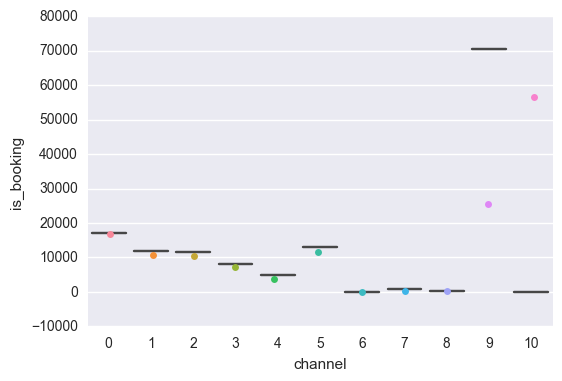

In [86]:
sns.violinplot(x="channel", y="is_booking", data=marketq1_book_channel_data,palette='rainbow')
sns.stripplot(x="channel", y="is_booking", data=marketq2_book_channel_data,jitter=True)

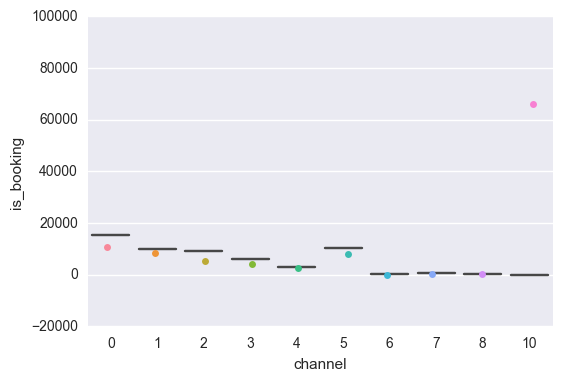

In [87]:
sns.violinplot(x="channel", y="is_booking", data=marketq3_book_channel_data,palette='rainbow')
sns.stripplot(x="channel", y="is_booking", data=marketq4_book_channel_data,jitter=True)

# Conclusion : Thus we compared Marketing channels across each quarters and understand their patterns

# ===========================================================

# E) **Loyal/Runaway Customer Booking Pattern** : Analysing relation between ratings and Booking price paid



**Steps**
- Find the columns including user details (city, country,user id) and the hotel destinations that he booked with rates and ratings of experiences over website
- Find counts for the number of times one books and then find average rating and price paid by the user. 
- Find all the user attributes for users and store in csv file

In [89]:
# Finding the Local customer attributes from the Dataframe 
local_customer_df = full_quarter[['user_location_country','user_location_city','user_id','srch_destination_id','srch_destination_type_id','hotel_country','hotel_market','is_booking','ratings','pricepaid','channel']]
local_customer_df = local_customer_df[(local_customer_df['is_booking']==1)]
local_customer_df_highest_bookings = local_customer_df[['user_id','is_booking','ratings','pricepaid']]
loyal_customer_df = local_customer_df_highest_bookings.groupby('user_id').sum().sort('is_booking',ascending = False)

C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:5: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



In [90]:
loyal_customer_df.head(2)
loyal_customer_df.reset_index(inplace=True)
loyal_customer_df['Average Ratings'] = loyal_customer_df['ratings']/loyal_customer_df['is_booking']
loyal_customer_df['Average Pricepaid'] = loyal_customer_df['pricepaid']/loyal_customer_df['is_booking']

In [91]:
loyal_customer_df.head(4)

user_id  is_booking  ratings  pricepaid  Average Ratings  Average Pricepaid
0   352102          88      431     255679         4.897727        2905.443182
1    16538          81      436     250085         5.382716        3087.469136
2   225649          78      361     230457         4.628205        2954.576923
3   864899          65      340     195153         5.230769        3002.353846

In [92]:
#loyal_customer_df.join(local_customer_df,how='inner',on='user_id')
loyal_customer_join_pattern  = loyal_customer_df[['user_id','Average Ratings','Average Pricepaid']]

In [93]:
user_city_country = local_customer_df[['user_id','user_location_country','user_location_city','channel']]

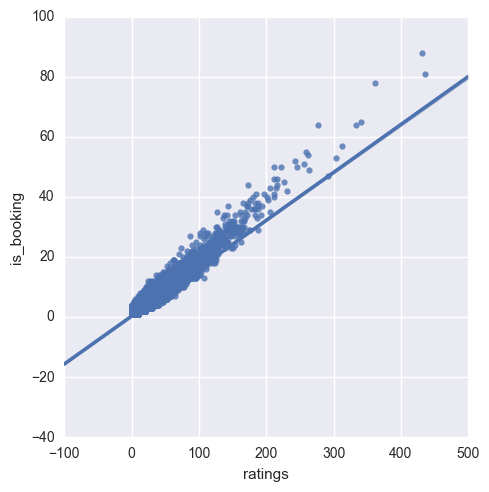

In [94]:
sns.lmplot(x="ratings", y="is_booking",data=loyal_customer_df)

In [95]:
final_customer_loyal_list = loyal_customer_join_pattern.merge(user_city_country,how='inner')
final_customer_loyal_list.to_csv('loyal_customer_list.csv')

# Conclusion : We can clearly see that if the experience for a user was better, they did not hesistate to pay more. 

# Analysis : Findind the most runway customers list and then identifying user attributes  (country, city, marketing channel, ratings, prices paid

**Steps**
- Find the columns including user details (city, country,user id) and the hotel destinations that he booked with rates and ratings of experiences over website
- Find counts for the number of times one books and then find average rating and price paid by the user. 
- Find all the user attributes for users and store in csv file

In [96]:
# Finding the Local customer attributes from the Dataframe 
local_customer_df = full_quarter[['user_location_country','user_location_city','user_id','srch_destination_id','srch_destination_type_id','hotel_country','hotel_market','is_booking','ratings','pricepaid','channel']]
runaway_customer_df = local_customer_df[(local_customer_df['is_booking']==0)]
runaway_customer_df_highest_bookings = runaway_customer_df[['user_id','is_booking','ratings','pricepaid']]
runaway_customer_df = runaway_customer_df_highest_bookings.groupby('user_id').count().sort('is_booking',ascending = False)

C:\Users\Jay Padhya\Anaconda3\New\lib\site-packages\ipykernel\__main__.py:5: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



In [97]:
runaway_customer_df.head(2)
runaway_customer_df.reset_index(inplace=True)
runaway_customer_df['Average Ratings'] = runaway_customer_df['ratings']/loyal_customer_df['is_booking']
runaway_customer_df['Average Pricepaid'] = runaway_customer_df['pricepaid']/loyal_customer_df['is_booking']

In [98]:
#loyal_customer_df.join(local_customer_df,how='inner',on='user_id')
runaway_customer_join_pattern  = runaway_customer_df[['user_id','Average Ratings','Average Pricepaid']]

In [99]:
user_city_country = local_customer_df[['user_id','user_location_country','user_location_city','channel']]

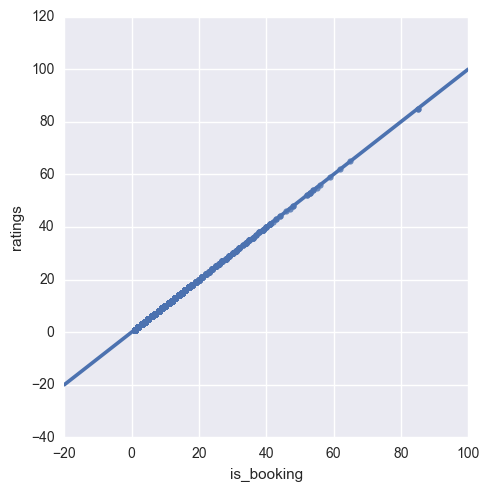

In [100]:
sns.lmplot(x="is_booking", y="ratings",data=runaway_customer_df)

# Conclusion:  Runaway users did not book through Expedia meaning there are few slipaway that Expedia needs to understand. Also, users with negative ratings never booked. 

In [101]:
final_customer_runaway_list = runaway_customer_join_pattern.merge(user_city_country,how='inner')
final_customer_runaway_list.to_csv('runaway_customer_list.csv')

# ========================================================

# F) **Hotel Pricing Segmentation and Rating segmentation** : Understanding the price ranges and dissecting hotels into groups 

** Steps **
- Read the data and analyse to find overall sum of ratings for each hotel 
- Read the data and analyse to find overall sum of prices for each hotel 
- Find the median, mode and mean to find a dissecting point and then classify a hotel based on the mid value


In [102]:
full_quarter_hotelID_ratings = full_quarter[['srch_destination_id','ratings','pricepaid']]
full_quarter_hotelID_ratings.head(3)

srch_destination_id  ratings  pricepaid
208318                 8818        1       2961
334276                12178        7       2085
863502                 8260        9       1941

In [103]:
average_hotel_sum_ratings = full_quarter_hotelID_ratings.groupby('srch_destination_id').sum()
average_hotel_count_ratings = full_quarter_hotelID_ratings.groupby('srch_destination_id').count()

In [104]:
average_hotel_count_ratings['hotelID'] = average_hotel_count_ratings.index

In [105]:
average_hotel_sum_ratings = full_quarter_hotelID_ratings.groupby('srch_destination_id').sum()
average_hotel_count_ratings = full_quarter_hotelID_ratings.groupby('srch_destination_id').count()
average_hotel_ratings = average_hotel_sum_ratings /average_hotel_count_ratings

In [106]:
average_hotel_ratings.head(4)

ratings    pricepaid
srch_destination_id                       
4                    5.500000  3053.750000
8                    5.554140  2949.292994
9                    4.045455  2964.227273
10                   2.000000  2881.000000

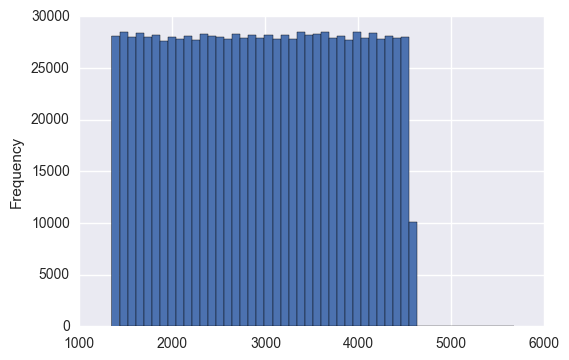

In [118]:
# TO calculate the rang eof the prices hotel - we need a histogram to know the range
(full_quarter_hotelID_ratings['pricepaid']).plot.hist(bins=50)

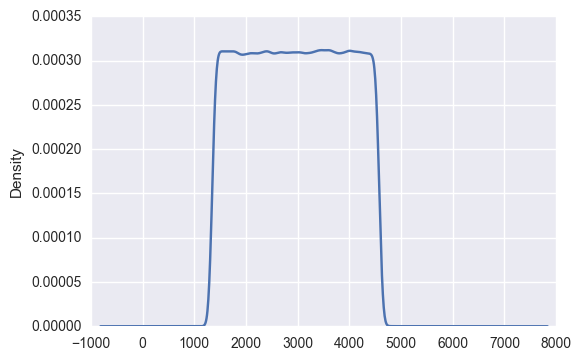

In [119]:
full_quarter_hotelID_ratings['pricepaid'].plot.kde()

In [108]:
mean = full_quarter_hotelID_ratings['pricepaid'].mean()
median = full_quarter_hotelID_ratings['pricepaid'].median()
mode = full_quarter_hotelID_ratings['pricepaid'].mode()

In [109]:
median

2964.0

In [110]:
mean

2962.3117745511768

In [111]:
mode

0    3856
dtype: int64

In [112]:
max_price = full_quarter_hotelID_ratings.loc[full_quarter_hotelID_ratings['pricepaid'].idxmax()]
min_price = full_quarter_hotelID_ratings.loc[full_quarter_hotelID_ratings['pricepaid'].idxmin()]

In [113]:
min_price = min_price.reset_index #print to know max value
max_price = max_price.reset_index  #Print to know the min value

In [114]:
max_price

<bound method Series.reset_index of srch_destination_id    20278
ratings                    9
pricepaid               5672
Name: 1048510, dtype: int64>

** Thus we see that the range for pricing is form 1346 to 5672 - we classify the hotels as Economical and Luxurious**
- We classify the range as "Economical", "Luxury" to segment hotels depending on prices as  1000-3500 and 3500+**

In [115]:
full_quarter['hotel_category'] = np.where(full_quarter['pricepaid']>=2964, 'Luxury', 'Economical')

In [116]:
hotel_category = full_quarter
hotel_category.head(2)

id           date_time  site_name  posa_continent  \
208318  208318 2015-01-09 00:00:00         24               2   
334276  334276 2015-01-09 00:01:00          2               3   

        user_location_country  user_location_region  user_location_city  \
208318                      3                    50               13871   
334276                     66                   174               23793   

        orig_destination_distance  user_id  is_mobile       ...        \
208318                        NaN   695255          1       ...         
334276                   2074.951  1111209          0       ...         

        hotel_market  is_booking ratings pricepaid  Quarter  Year  Month  \
208318            88           1       1      2961        1  2015      1   
334276           350           1       7      2085        1  2015      1   

           Day  Hour_of_Day  hotel_category  
208318  Friday            0      Economical  
334276  Friday            0      Economical  

[2 rows x 31 columns]

In [117]:
hotel_category.to_csv("hotel_catgories_economical_luxury.csv")

# Conclusion: Thus we have analysed and segmented hotels as per their prices